In [1]:
from statistics import mean
import random
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [2]:
class BGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficient_ = []

    def fit(self, x, y, learning_rate=0.001, no_epochs=1000, batch_size=20):
        self.coefficient_ = [random.random() for _ in range(len(x[0]) + 1)]
        n = len(x)
        for epoch in range(no_epochs):
            #shuffle the dataset
            indices = list(range(n))
            random.shuffle(indices)
            x = [x[i] for i in indices]
            y = [y[i] for i in indices]
            #iterate over batches
            for i in range(0, n, batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                errors = []
                for xi,yi in zip(x_batch, y_batch):
                    y_computed = self.eval(xi)
                    errors.append(y_computed - yi)
                error = mean(errors)
                for xi,yi in zip(x_batch, y_batch):
                    for j in range(len(xi)):
                        self.coefficient_[j] -= learning_rate * error * xi[j]
                self.coefficient_[-1] -= learning_rate * error
        self.intercept_ = self.coefficient_[-1]
        self.coefficient_ = self.coefficient_[:-1]

    def eval(self, xi):
        yi = self.coefficient_[-1]
        for j in range(len(xi)):
            yi += self.coefficient_[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

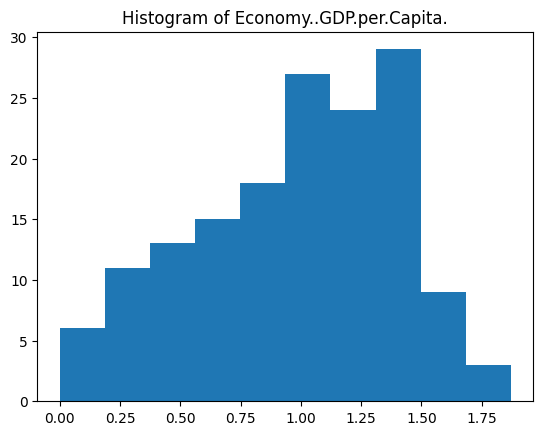

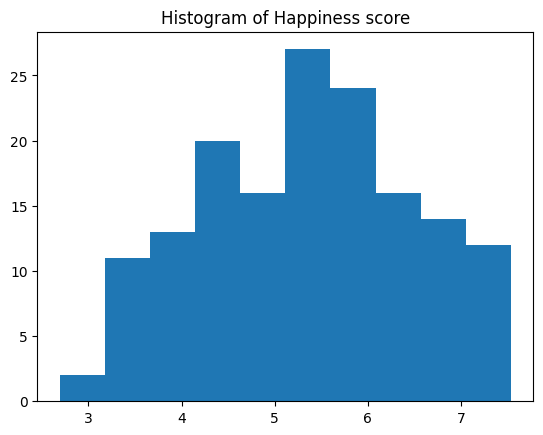

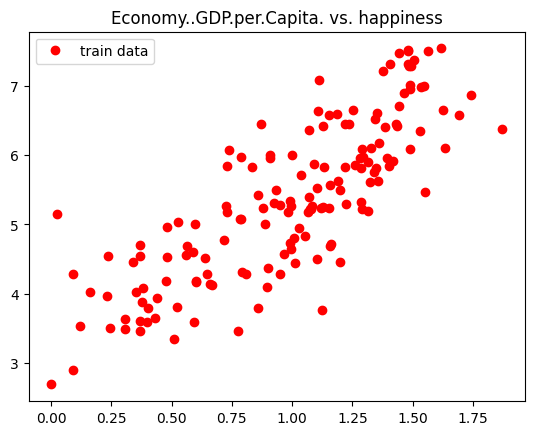

the learnt model by using code: f(x) =  0.0019800459784998174 + 0.7861163231498431 * x


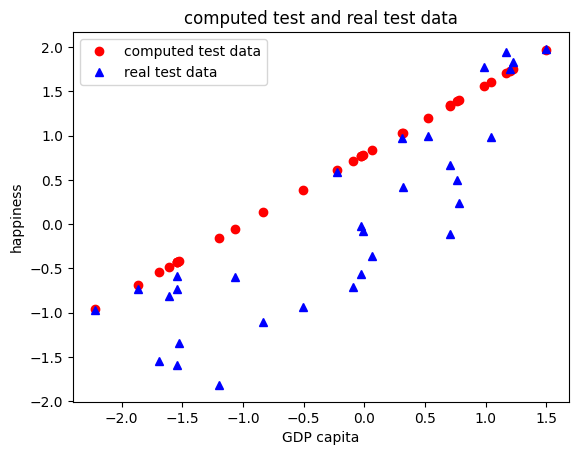

prediction error (manual):  0.7096479036553698
prediction error (tool):   0.7096479036553698


In [3]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()


def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1

    selectedVariable = dataNames.index(inputVariabName)
    selectedOutput = dataNames.index(outputVariabName)

    inputs = []
    outputs = []

    for row in data:
        try:
            inputs.append(float(row[selectedVariable]))
            outputs.append(float(row[selectedOutput]))
        except ValueError:                                
            pass

    return inputs, outputs

def data_normalisation(trainData, testData):
    mean = np.mean(trainData)
    std = np.std(trainData)

    trainData = [(el - mean) / std for el in trainData]
    testData = [(el - mean) / std for el in testData]

    return trainData, testData

def cu_tool_o_variabila(filePath):

    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'Economy..GDP.per.Capita.')
    plotDataHistogram(outputs, 'Happiness score')  

    # check the liniarity
    plotData(inputs, outputs, [], [], [], [], 'Economy..GDP.per.Capita. vs. happiness')
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]

    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    # Normalizare date
    trainInputs, testInputs = data_normalisation(trainInputs, testInputs)
    trainOutputs, testOutputs = data_normalisation(trainOutputs, testOutputs)

    plt.plot(trainInputs, trainOutputs, 'ro', label='training data')  # train data are plotted by red and circle sign
    plt.plot(testInputs, testOutputs, 'g^', label='testing data')  # test data are plotted by green and a triangle sign
    plt.title('train and test data')
    plt.xlabel('GDP capita')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()


    # Antrenare 

    xx = [[el] for el in trainInputs]

    regressor = SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.1)
    regressor.fit(np.array(trainInputs).reshape(-1, 1), trainOutputs)
    
    w0, w1 = regressor.intercept_[0], regressor.coef_[0]
    print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


    # Plot final
    noOfPoints = 1000
    xref = []
    val = min(trainInputs)
    step = (max(trainInputs) - min(trainInputs)) / noOfPoints
    for i in range(1, noOfPoints):
        xref.append(val)
        val += step
    yref = [w0 + w1 * el for el in xref]

    plt.plot(trainInputs, trainOutputs, 'yo', label='training data') 
    plt.plot(xref, yref, 'g-', label='learnt model')
    plt.title('train data and the learnt model')
    plt.xlabel('GDP capita')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()

    computedTestOutputs = regressor.predict([[x] for x in testInputs])

    # computed outputs
    plt.plot(testInputs, computedTestOutputs, 'ro',label='computed test data')
    plt.plot(testInputs, testOutputs, 'b^', label='real test data')
    plt.title('computed test and real test data')
    plt.xlabel('GDP capita')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()


    # Erori
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print('prediction error (tool):  ', error)


def cu_cod_propriu_o_variabila(filePath):
    inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

    plotDataHistogram(inputs, 'Economy..GDP.per.Capita.')
    plotDataHistogram(outputs, 'Happiness score')

    # liniaritatea 
    plotData(inputs, outputs, [], [], [], [], 'Economy..GDP.per.Capita. vs. happiness')
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]

    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    # Normalizare
    trainInputs, testInputs = data_normalisation(trainInputs, testInputs)
    trainOutputs, testOutputs = data_normalisation(trainOutputs, testOutputs)

    # Antrenare model

    xx = [[el] for el in trainInputs]
    regressor = BGDRegression()
    regressor.fit(xx, trainOutputs)
    w0, w1 = regressor.intercept_, regressor.coefficient_[0]
    print('the learnt model by using code: f(x) = ', w0, '+', w1, '* x')
    computedTestOutputs = regressor.predict([[x] for x in testInputs])


    # Rezultate

    plt.plot(testInputs, computedTestOutputs, 'ro',label='computed test data')
    plt.plot(testInputs, testOutputs, 'b^', label='real test data') 
    plt.title('computed test and real test data')
    plt.xlabel('GDP capita')
    plt.ylabel('happiness')
    plt.legend()
    plt.show()

    # Erori
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    # by using sklearn
    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print('prediction error (tool):  ', error)



crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'world-happiness-report-2017.csv')
#cu_tool_o_variabila(filePath)
cu_cod_propriu_o_variabila(filePath)

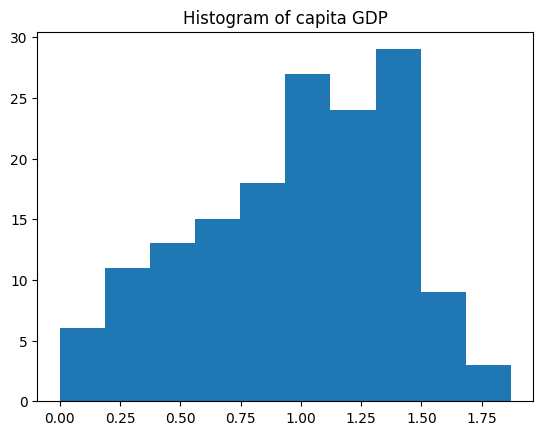

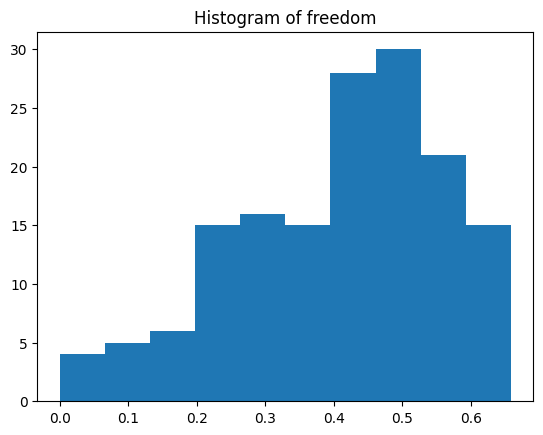

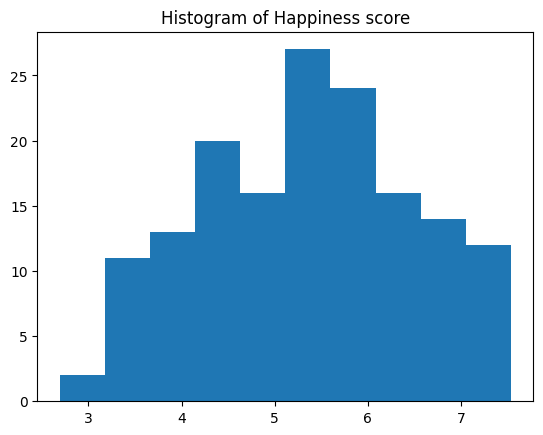

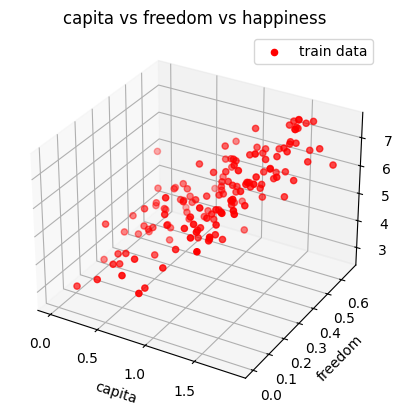

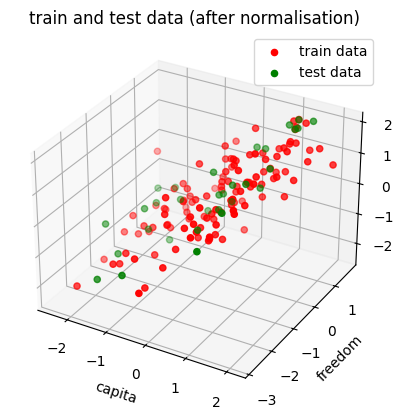

the learnt model by using a tool: f(x) = 0.11046397850274109 + 0.7179377806995019 * x1 + 0.39478010302949884 * x2


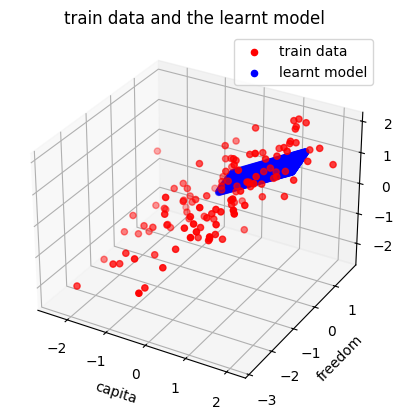

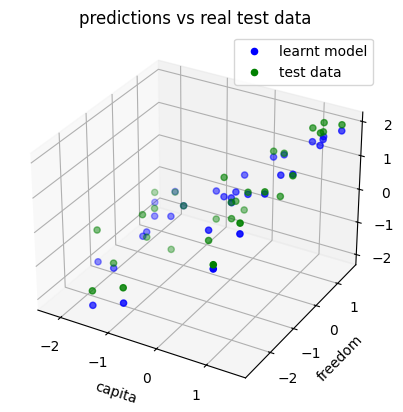

prediction error (manual):  0.21619714406889196
prediction error (tool):    0.21619714406889196


In [4]:
# load data and consider two features and the output to be estimated (happiness)
def loadData(fileName, inputVariabName1, inputVariabName2, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                modified_row = []
                for cell in row:
                    if cell == '':
                        modified_row.append(0)
                    else:
                        modified_row.append(cell)
                data.append(modified_row)
            line_count += 1

    selectedVariable1 = dataNames.index(inputVariabName1)
    inputs1 = [float(data[i][selectedVariable1]) for i in range(len(data))]

    selectedVariable2 = dataNames.index(inputVariabName2)
    feature2 = [float(data[i][selectedVariable2]) for i in range(len(data))]

    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs1, feature2, outputs

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()


def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

from mpl_toolkits import mplot3d
def plot3Ddata(x1Train, x2Train, yTrain, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    if x1Train:
        ax.scatter3D(x1Train, x2Train, yTrain, c='r', label='train data')
    if x1Model:
        ax.scatter3D(x1Model, x2Model, yModel, c='b', label='learnt model')
    if x1Test:
        ax.scatter3D(x1Test, x2Test, yTest, c='g', label='test data')

    ax.set_title(title)
    ax.set_xlabel('capita')
    ax.set_ylabel('freedom')
    ax.set_zlabel('happiness')

    plt.legend()
    plt.show()

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        # encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  # fit only on training data
        normalisedTrainData = scaler.transform(trainData)  # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        # decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  # fit only on training data
        normalisedTrainData = scaler.transform(trainData)  # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

def cu_tool_doua_variabile(filePath):

    inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'],'Happiness.Score')

    feature1 = [ex[0] for ex in inputs]
    feature2 = [ex[1] for ex in inputs]

    # plot the data histograms
    plotDataHistogram(feature1, 'capita GDP')
    plotDataHistogram(feature2, 'freedom')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
    plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')


    #PAS 2 - IMPARTIRE DATE PE TRAIN SI TEST SI NORMALIZARE
    # Split the Data Into Training and Test Subsets
    # In this step we will split our dataset into training and testing subsets (in proportion 80/20%).
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

    feature1train = [ex[0] for ex in trainInputs]
    feature2train = [ex[1] for ex in trainInputs]

    feature1test = [ex[0] for ex in testInputs]
    feature2test = [ex[1] for ex in testInputs]

    plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs,"train and test data (after normalisation)")

    #PAS 3 - INVATARE MODEL CU TOOL
    #using sklearn
    #training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns

    # model initialisation
    regressor = linear_model.SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.1)
    regressor.fit(trainInputs, trainOutputs)
    w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
    print('the learnt model by using a tool: f(x) =', w0, '+', w1, '* x1', '+', w2, '* x2')


    #PAS 4 - PLOT REZULTATE
    noOfPoints = 50
    xref1 = []
    val = min(feature1)
    step1 = (max(feature1) - min(feature1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(feature2)
    step2 = (max(feature2) - min(feature2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2
    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
    plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [],'train data and the learnt model')

    # use the trained model to predict new inputs
    # makes predictions for test data
    # computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]
    # makes predictions for test data (by tool)
    computedTestOutputs = regressor.predict(testInputs)
    plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs,'predictions vs real test data')

    #PAS 5 - CALCUL METRICI DE PERFORMANTA (eroarea)
    # compute the differences between the predictions and real outputs
    error = 0.0
    for t1, t2 in zip(computedTestOutputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(testOutputs, computedTestOutputs)
    print('prediction error (tool):   ', error)


def cu_cod_propriu_doua_variabile(filePath):
    inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

    feature1 = [ex[0] for ex in inputs]
    feature2 = [ex[1] for ex in inputs]

    # plot the data histograms
    plotDataHistogram(feature1, 'capita GDP')
    plotDataHistogram(feature2, 'freedom')
    plotDataHistogram(outputs, 'Happiness score')

    # check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
    plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

    # PAS 2 - IMPARTIRE DATE PE TRAIN SI TEST SI NORMALIZARE
    # Split the Data Into Training and Test Subsets
    # In this step we will split our dataset into training and testing subsets (in proportion 80/20%).
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    trainInputs, testInputs = normalisation(trainInputs, testInputs)
    trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

    feature1train = [ex[0] for ex in trainInputs]
    feature2train = [ex[1] for ex in trainInputs]

    feature1test = [ex[0] for ex in testInputs]
    feature2test = [ex[1] for ex in testInputs]

    plot3Ddata(feature1train, feature2train, trainOutputs, [], [], [], feature1test, feature2test, testOutputs,"train and test data (after normalisation)")

    #PAS 3 - INVATARE MODEL CU COD PROPRIU
    regressor = BGDRegression()
    regressor.fit(trainInputs, trainOutputs)
    w0, w1, w2 = regressor.intercept_, regressor.coefficient_[0], regressor.coefficient_[1]
    print('the learnt model by using code: f(x) = ', w0, '+', w1, '* x1', '+', w2, '* x2')
    computed_outputs = regressor.predict(testInputs)


    #pas 4 - PLOT REZULTATE
    noOfPoints = 50
    xref1 = []
    val = min(feature1)
    step1 = (max(feature1) - min(feature1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(feature2)
    step2 = (max(feature2) - min(feature2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2
    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
    plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [],'train data and the learnt model')


    #PAS 5 - CALCUL METRICI DE PERFORMANTA (eroarea)
    error = 0.0
    for t1, t2 in zip(computed_outputs, testOutputs):
        error += (t1 - t2) ** 2
    error = error / len(testOutputs)
    print('prediction error (manual): ', error)

    from sklearn.metrics import mean_squared_error

    error = mean_squared_error(testOutputs, computed_outputs)
    print('prediction error (tool):   ', error)


if __name__ == "__main__":
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'world-happiness-report-2017.csv')
    cu_tool_doua_variabile(filePath)
    # cu_cod_propriu_doua_variabile(filePath)